In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!conda install -c anaconda xlrd --yes

file_path = "/Users/chiragprabhakar/Documents/TradeData_Nigeria_ghana.xls"

df = pd.read_excel(file_path)

Retrieving notices: done
Channels:
 - anaconda
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.12.31 |       hca03da5_0         136 KB  anaconda
    conda-24.11.3              |  py312hca03da5_0         1.2 MB  anaconda
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following packages will be UPDATED:

  ca-certificates                     2024.11.26-hca03da5_0 --> 2024.12.31-hca03da5_0 
  conda                             24.11.2-py312hca03da5_0 --> 24.11.3-py312hca03da5_0 



conda-24.11.3        | 1.2 MB    |                                       |   0% 
ca-certificates-2024 | 136 KB    |                                    

In [5]:
# Summary of the Dataset
# Number of Rows: 368
# Number of Columns: 10
# Column Details:
# period: Year of the trade (e.g., 2017).
# reporterDesc: Reporting entity (e.g., Ghana).
# partnerDesc: Trade partner (e.g., World, Australia).
# cmdCode: Commodity code (e.g., 7108).
# qtyUnitAbbr: Quantity unit abbreviation (e.g., kg).
# qty: Quantity of the traded commodity.
# altQty: Alternate quantity representation.
# netWgt: Net weight of the commodity (some missing values).
# fobvalue: Free on board (FOB) value in monetary terms.
# primaryValue: Primary trade value.
# Next Steps
# Data Cleaning:
# Handle missing values.
# Standardize or remove irrelevant columns, if necessary.
# Insights:
# Summarize key trends (e.g., total trade value per country, top commodities, etc.).
# Visualize the data for better understanding.
# I will begin by cleaning the data. Let’s handle the missing values and ensure consistency. ​​

# The missing values in the dataset have been addressed:

# Missing Values Summary
# Before Cleaning:
# netWgt: 12 missing values.
# qtyUnitAbbr: 21 missing values.
# After Cleaning:
# All missing values resolved:
# netWgt: Missing values filled with the median.
# qtyUnitAbbr: Missing values replaced with "Unknown."
# Next, I will explore the dataset to provide insights, such as:

# Total trade value by reporting entity.
# Most traded commodities.
# Partners with the highest trade values.


In [6]:
print(df.head())

   period reporterDesc partnerDesc  cmdCode qtyUnitAbbr         qty  altQty  \
0    2017        Ghana       World     7108          kg  197809.923    0.00   
1    2017        Ghana   Australia     7108          kg      28.140   28.14   
2    2017        Ghana     Belgium     7108          kg      20.740   20.74   
3    2017        Ghana      Brazil     7108          kg       0.590    0.59   
4    2017        Ghana      Canada     7108          kg       0.460    0.46   

   netWgt      fobvalue  primaryValue  
0     NaN  5.858281e+09  5.858281e+09  
1   28.14  1.103010e+06  1.103010e+06  
2   20.74  9.274560e+05  9.274560e+05  
3    0.59  4.926127e+03  4.926127e+03  
4    0.46  1.940124e+04  1.940124e+04  


In [10]:
missing_summary = df.isnull().sum()
# Handle missing values
# - For 'netWgt', fill missing values with the column's median
df['netWgt'].fillna(df['netWgt'].median(), inplace=True)

# - For 'qtyUnitAbbr', fill missing values with a placeholder
df['qtyUnitAbbr'].fillna('Unknown', inplace=True)

# Verify if missing values are resolved
cleaned_missing_summary = df.isnull().sum()

# Return the missing value summary before and after cleaning
missing_summary, cleaned_missing_summary

/var/folders/6l/_0lkgy4j415437kjczzvtdnh0000gn/T/ipykernel_48709/1112347663.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['netWgt'].fillna(df['netWgt'].median(), inplace=True)
/var/folders/6l/_0lkgy4j415437kjczzvtdnh0000gn/T/ipykernel_48709/1112347663.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

(period           0
 reporterDesc     0
 partnerDesc      0
 cmdCode          0
 qtyUnitAbbr     21
 qty              0
 altQty           0
 netWgt          12
 fobvalue         0
 primaryValue     0
 dtype: int64,
 period          0
 reporterDesc    0
 partnerDesc     0
 cmdCode         0
 qtyUnitAbbr     0
 qty             0
 altQty          0
 netWgt          0
 fobvalue        0
 primaryValue    0
 dtype: int64)

In [14]:
df.describe()

,period,cmdCode,qty,altQty,netWgt,fobvalue,primaryValue
count,368.000000,368.000000,3.680000e+02,3.680000e+02,368.000000,3.680000e+02,3.680000e+02
mean,2019.725543,401029.627717,1.102788e+05,1.377325e+05,8822.780967,4.105521e+08,4.105521e+08
std,2.013091,349803.862087,4.705406e+05,6.304052e+05,26532.149520,1.211677e+09,1.211677e+09
min,2017.000000,7108.000000,0.000000e+00,0.000000e+00,0.000000,2.118613e+03,2.118613e+03
25%,2018.000000,7108.000000,1.870000e+00,1.840000e+00,1.560000,7.636318e+04,7.636318e+04
50%,2019.000000,710812.000000,5.375000e+01,5.187000e+01,13.470000,7.814786e+05,7.814786e+05
75%,2022.000000,710813.000000,3.217799e+03,2.329050e+03,601.012750,3.979433e+07,3.979433e+07
max,2023.000000,710813.000000,3.816019e+06,5.822523e+06,242131.663000,7.654650e+09,7.654650e+09


In [5]:
# Total trade value (fobvalue) by reporting entity (reporterDesc)
total_trade_by_reporter = df.groupby('reporterDesc')['fobvalue'].sum().sort_values(ascending=False)

# Most traded commodities by quantity (cmdCode)
top_commodities = df.groupby('cmdCode')['qty'].sum().sort_values(ascending=False).head(5)

# Trade partners with the highest FOB value
top_trade_partners = df.groupby('partnerDesc')['fobvalue'].sum().sort_values(ascending=False).head(5)

# Summarized insights
total_trade_by_reporter


reporterDesc
Ghana      1.498771e+11
Nigeria    1.206071e+09
Name: fobvalue, dtype: float64

In [6]:
# Total trade value (fobvalue) by reporting entity (reporterDesc)
total_trade_by_reporter = df.groupby('reporterDesc')['fobvalue'].sum().sort_values(ascending=False)
total_trade_by_reporter = total_trade_by_reporter.apply(lambda x: f"{x:,.2f}")
print("Total Trade Value by Reporting Entity:")
print(total_trade_by_reporter)

# Most traded commodities by quantity (cmdCode)
top_commodities = df.groupby('cmdCode')['qty'].sum().sort_values(ascending=False).head(5)
top_commodities = top_commodities.apply(lambda x: f"{x:,.2f}")
print("\nTop Commodities by Quantity:")
print(top_commodities)

# Trade partners with the highest FOB value
top_trade_partners = df.groupby('partnerDesc')['fobvalue'].sum().sort_values(ascending=False).head(5)
top_trade_partners = top_trade_partners.apply(lambda x: f"{x:,.2f}")
print("\nTop Trade Partners by FOB Value:")
print(top_trade_partners)



Total Trade Value by Reporting Entity:
reporterDesc
Ghana      149,877,088,502.54
Nigeria      1,206,070,726.15
Name: fobvalue, dtype: object

Top Commodities by Quantity:
cmdCode
7108      20,287,078.88
710813    19,959,555.37
710812       291,450.81
710811        44,496.07
Name: qty, dtype: object

Top Trade Partners by FOB Value:
partnerDesc
World                   75,541,579,614.83
Switzerland             29,101,831,578.69
India                   20,887,851,430.03
South Africa            15,010,604,071.80
United Arab Emirates     8,222,649,606.42
Name: fobvalue, dtype: object


In [7]:
# Separate the dataset into two DataFrames: one for Ghana and one for Nigeria
ghana_data = df[df['reporterDesc'] == 'Ghana']
nigeria_data = df[df['reporterDesc'] == 'Nigeria']

# Display the first few rows of each DataFrame to verify
ghana_data.head(), nigeria_data.head()


(   period reporterDesc partnerDesc  cmdCode qtyUnitAbbr         qty  altQty  \
 0    2017        Ghana       World     7108          kg  197809.923    0.00   
 1    2017        Ghana   Australia     7108          kg      28.140   28.14   
 2    2017        Ghana     Belgium     7108          kg      20.740   20.74   
 3    2017        Ghana      Brazil     7108          kg       0.590    0.59   
 4    2017        Ghana      Canada     7108          kg       0.460    0.46   
 
    netWgt      fobvalue  primaryValue  
 0   13.47  5.858281e+09  5.858281e+09  
 1   28.14  1.103010e+06  1.103010e+06  
 2   20.74  9.274560e+05  9.274560e+05  
 3    0.59  4.926127e+03  4.926127e+03  
 4    0.46  1.940124e+04  1.940124e+04  ,
      period reporterDesc           partnerDesc  cmdCode qtyUnitAbbr  qty  \
 129    2018      Nigeria                 World     7108     Unknown  0.0   
 130    2018      Nigeria  United Arab Emirates     7108          kg  1.0   
 131    2018      Nigeria               

In [8]:

dfg = pd.read_excel("/Users/chiragprabhakar/Documents/DataScience_Buisness/Ghana.xlsx")

In [9]:
print(dfg.head())

  typeCode freqCode  refPeriodId  refYear  refMonth  period  reporterCode  \
0        C        A     20180101     2018        52    2018           288   
1        C        A     20180101     2018        52    2018           288   
2        C        A     20180101     2018        52    2018           288   
3        C        A     20180101     2018        52    2018           288   
4        C        A     20180101     2018        52    2018           288   

  reporterISO reporterDesc flowCode  ...      netWgt  isNetWgtEstimated  \
0         GHA        Ghana        X  ...  242131.663               True   
1         GHA        Ghana        X  ...       0.300              False   
2         GHA        Ghana        X  ...      62.810              False   
3         GHA        Ghana        X  ...      47.350              False   
4         GHA        Ghana        X  ...       1.030              False   

  grossWgt isGrossWgtEstimated  cifvalue      fobvalue  primaryValue  \
0      NaN    

In [10]:
# Year	
# Country Code
# Report Country	
# Partner Country Code
# Partner Country	classificationCode	Commodity Desc	IS Not Powder	qty	qtyUnitAbbr	isQtyEstimated	altQtyUnitCode	altQtyUnitAbbr	altQty	netWgt	isNetWgtEstimated	fobvalue	
# legacyEstimationFlag
# isReported	isAggregate
columns_to_keep_one = ['refYear','reporterDesc','partnerISO','partnerDesc','classificationCode','cmdDesc','qty','qtyUnitAbbr','isQtyEstimated','altQtyUnitCode','altQtyUnitAbbr','altQty','netWgt','isNetWgtEstimated','fobvalue','legacyEstimationFlag','isReported','isAggregate']
dfg = dfg[columns_to_keep_one]

    

In [11]:
dfg.head()

,refYear,reporterDesc,partnerISO,partnerDesc,classificationCode,cmdDesc,qty,qtyUnitAbbr,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,isNetWgtEstimated,fobvalue,legacyEstimationFlag,isReported,isAggregate
0,2018,Ghana,W00,World,H5,Gold (including gold plated with platinum) unw...,242131.663,kg,True,-1,NaN,0.00,242131.663,True,6.092572e+09,0,False,True
1,2018,Ghana,AUS,Australia,H5,Gold (including gold plated with platinum) unw...,0.300,kg,False,8,kg,0.30,0.300,False,1.246759e+04,0,False,True
2,2018,Ghana,BEL,Belgium,H5,Gold (including gold plated with platinum) unw...,62.810,kg,False,8,kg,62.81,62.810,False,2.581128e+06,0,False,True
3,2018,Ghana,BRA,Brazil,H5,Gold (including gold plated with platinum) unw...,47.350,kg,False,8,kg,47.35,47.350,False,1.978183e+06,0,False,True
4,2018,Ghana,CAN,Canada,H5,Gold (including gold plated with platinum) unw...,1.030,kg,False,8,kg,1.03,1.030,False,4.195643e+04,0,False,True


In [12]:
dfn = pd.read_excel('/Users/chiragprabhakar/Documents/DataScience_Buisness/Nigeria_2.xlsx')


In [13]:
columns_to_keep_two = ['refYear','reporterDesc','partnerISO','partnerDesc','classificationCode','cmdDesc','qty','qtyUnitAbbr','isQtyEstimated','altQtyUnitCode','altQtyUnitAbbr','altQty','netWgt','isNetWgtEstimated','fobvalue','legacyEstimationFlag','isReported','isAggregate']
dfn = dfn[columns_to_keep_two]
dfn.head()

,refYear,reporterDesc,partnerISO,partnerDesc,classificationCode,cmdDesc,qty,qtyUnitAbbr,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,isNetWgtEstimated,fobvalue,legacyEstimationFlag,isReported,isAggregate
0,2018,Nigeria,W00,World,H4,Gold (including gold plated with platinum) unw...,0.0,NaN,False,-1,NaN,0.0,NaN,False,63250.052,0,False,True
1,2018,Nigeria,ARE,United Arab Emirates,H4,Gold (including gold plated with platinum) unw...,1.0,kg,False,8,kg,1.0,1.0,False,24941.795,0,False,True
2,2018,Nigeria,USA,USA,H4,Gold (including gold plated with platinum) unw...,0.0,NaN,False,-1,NaN,0.0,NaN,False,38308.257,0,False,True
3,2018,Nigeria,W00,World,H4,"Metals; gold, non-monetary, unwrought (but not...",0.0,NaN,False,8,kg,1001.0,NaN,False,63250.052,0,False,True
4,2018,Nigeria,ARE,United Arab Emirates,H4,"Metals; gold, non-monetary, unwrought (but not...",1.0,kg,False,8,kg,1.0,1.0,False,24941.795,0,False,True


In [14]:
# Combine Ghana (dfg) and Nigeria (dfn) tables
data = pd.concat([dfg, dfn], ignore_index=True)

# Display the combined DataFrame
print(data)

     refYear reporterDesc partnerISO           partnerDesc classificationCode  \
0       2018        Ghana        W00                 World                 H5   
1       2018        Ghana        AUS             Australia                 H5   
2       2018        Ghana        BEL               Belgium                 H5   
3       2018        Ghana        BRA                Brazil                 H5   
4       2018        Ghana        CAN                Canada                 H5   
..       ...          ...        ...                   ...                ...   
304     2022      Nigeria        ARE  United Arab Emirates                 H6   
305     2023      Nigeria        W00                 World                 H6   
306     2023      Nigeria        CHE           Switzerland                 H6   
307     2023      Nigeria        W00                 World                 H6   
308     2023      Nigeria        CHE           Switzerland                 H6   

                           

In [15]:
# Save DataFrame to Excel
# data.to_excel("merged_data.xlsx", index=False)

# print("Data has been saved to 'merged_data.xlsx'")

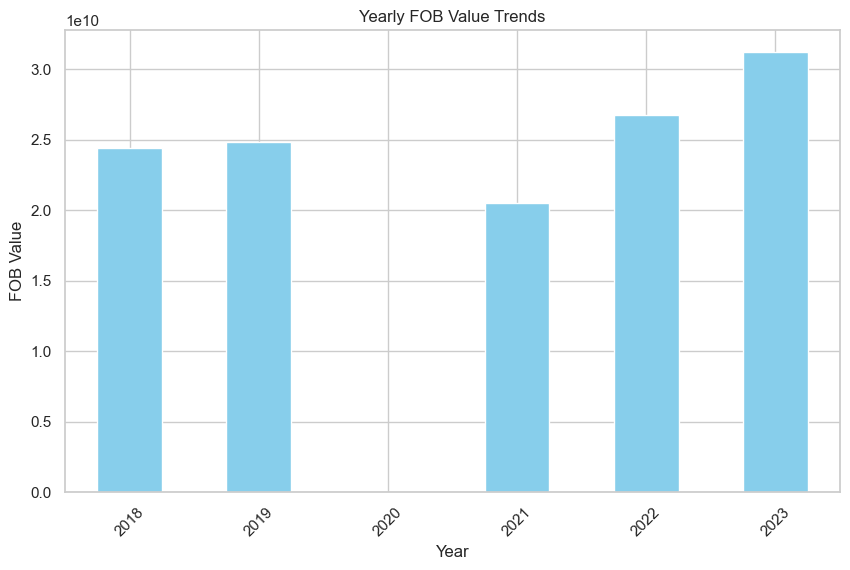

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for visualizations
sns.set(style="whitegrid")

# 1. Yearly Trends
plt.figure(figsize=(10, 6))
yearly_fob = data.groupby('refYear')['fobvalue'].sum()
yearly_fob.plot(kind='bar', color='skyblue')
plt.title('Yearly FOB Value Trends')
plt.ylabel('FOB Value')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

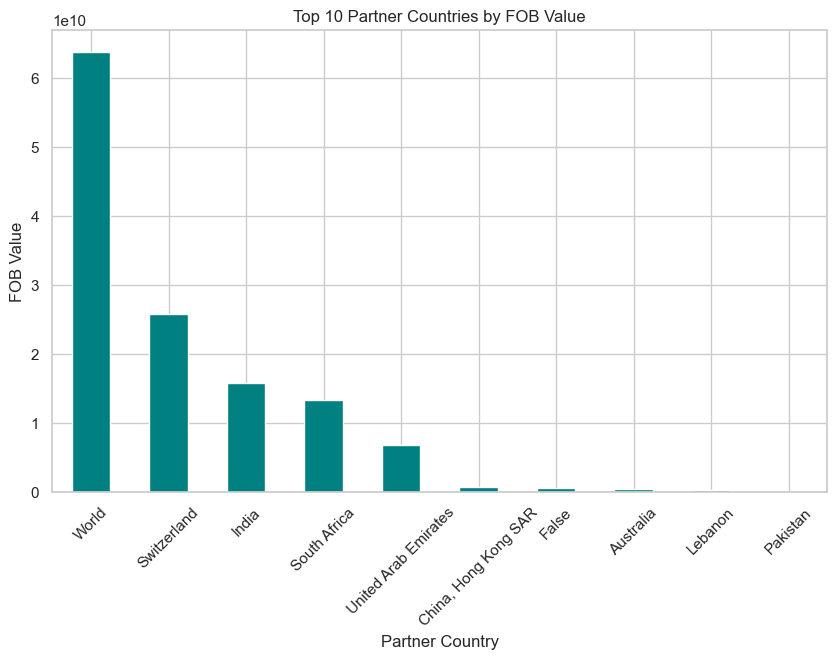

In [17]:
# 2. Top Partner Countries by FOB Value
plt.figure(figsize=(10, 6))
top_partners = data.groupby('partnerDesc')['fobvalue'].sum().nlargest(10)
top_partners.plot(kind='bar', color='teal')
plt.title('Top 10 Partner Countries by FOB Value')
plt.ylabel('FOB Value')
plt.xlabel('Partner Country')
plt.xticks(rotation=45)
plt.show()

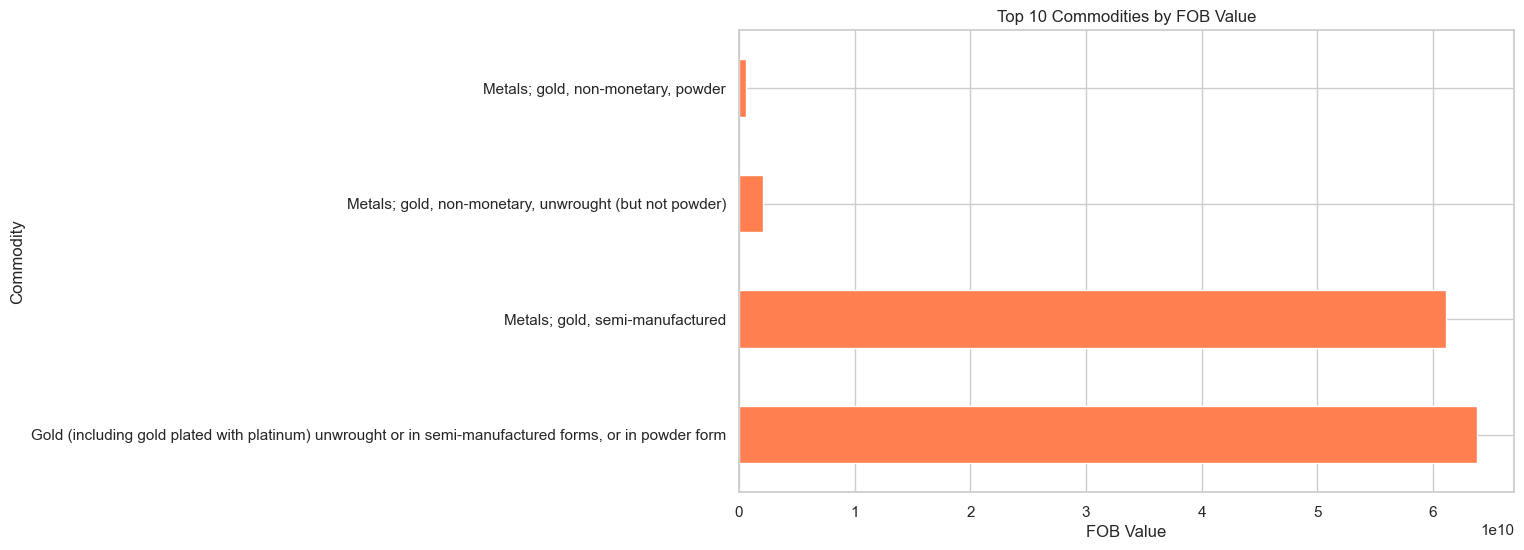

In [18]:
# 3. Commodity Analysis
plt.figure(figsize=(10, 6))
top_commodities = data.groupby('cmdDesc')['fobvalue'].sum().nlargest(10)
top_commodities.plot(kind='barh', color='coral')
plt.title('Top 10 Commodities by FOB Value')
plt.xlabel('FOB Value')
plt.ylabel('Commodity')
plt.show()

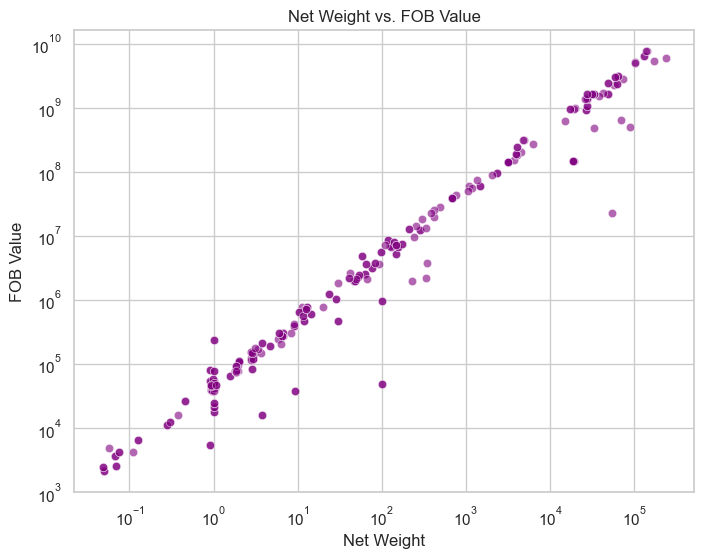

In [19]:
# 4. Weight vs. Value Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='netWgt', y='fobvalue', data=data, alpha=0.6, color='purple')
plt.title('Net Weight vs. FOB Value')
plt.xlabel('Net Weight')
plt.ylabel('FOB Value')
plt.xscale('log')
plt.yscale('log')
plt.show()

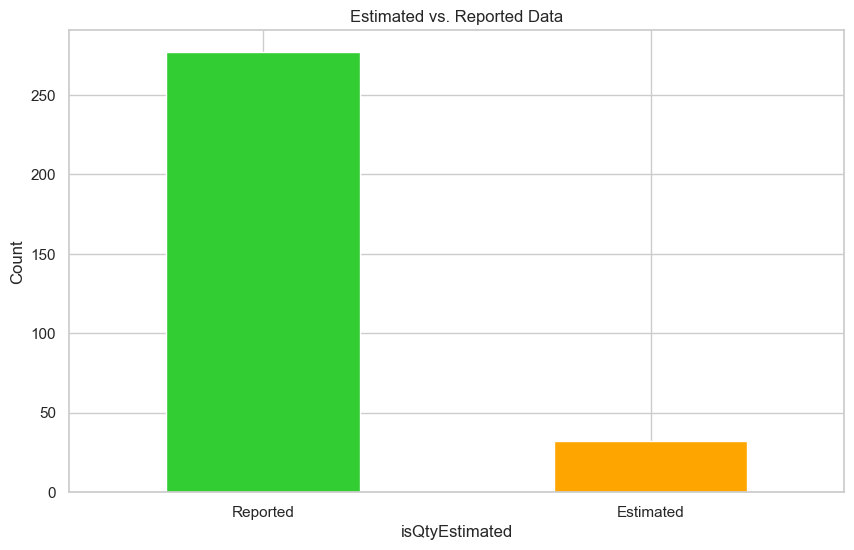

In [20]:
# 5. Estimated vs. Reported Data
plt.figure(figsize=(10, 6))
estimation_counts = data['isQtyEstimated'].value_counts()
estimation_counts.plot(kind='bar', color=['limegreen', 'orange'])
plt.title('Estimated vs. Reported Data')
plt.xticks([0, 1], ['Reported', 'Estimated'], rotation=0)
plt.ylabel('Count')
plt.show()

In [21]:
# Filter data for Ghana and Nigeria
filtered_data = data[data['reporterDesc'].isin(['Ghana', 'Nigeria'])]

# Group by exporting country and importing country, summing quantities
top_exports = (
    filtered_data.groupby(['reporterDesc', 'partnerDesc'])
    .agg({'qty': 'sum'})
    .reset_index()
)


# Sort and find the top 5 importing countries for each exporting country
top_5_exports = (
    top_exports.sort_values(['reporterDesc', 'qty'], ascending=[True, False])
    .groupby('reporterDesc')
    .head(5)
)

# Display the results
print(top_5_exports)



   reporterDesc           partnerDesc           qty
47        Ghana                 World  1.971390e+07
41        Ghana           Switzerland  9.809921e+06
39        Ghana          South Africa  5.776229e+06
17        Ghana                 India  3.445864e+06
44        Ghana  United Arab Emirates  5.682403e+05
53      Nigeria                 World  4.515652e+04
50      Nigeria           Switzerland  4.455374e+04
52      Nigeria  United Arab Emirates  7.020000e+02
49      Nigeria         Rep. of Korea  2.000000e+02
48      Nigeria                 False  6.000000e+01


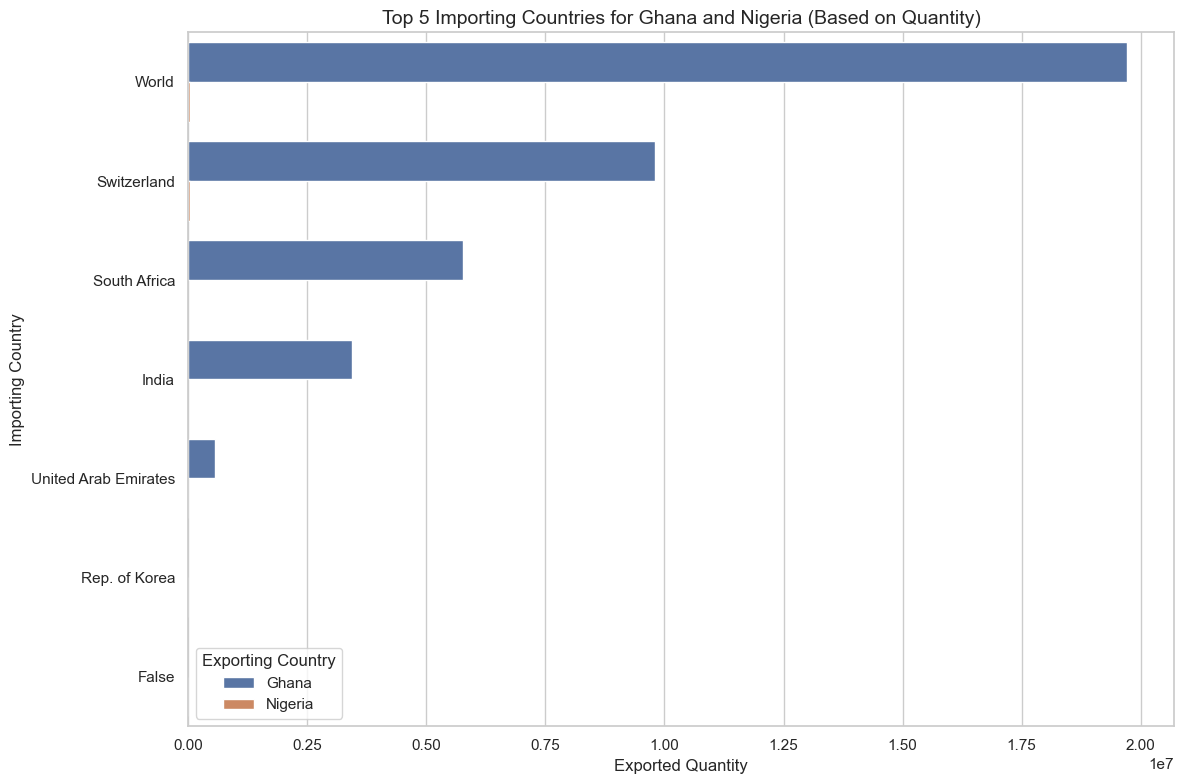

In [46]:
# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_5_exports,
    x='qty',
    y='partnerDesc',
    hue='reporterDesc',
    dodge=True
)
plt.title('Top 5 Importing Countries for Ghana and Nigeria (Based on Quantity)', fontsize=14)
plt.xlabel('Exported Quantity', fontsize=12)
plt.ylabel('Importing Country', fontsize=12)
plt.legend(title='Exporting Country')
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
# Helper function to format large numbers
def format_quantity(qty):
    if qty >= 1_000_000_000:
        return f"{qty / 1_000_000_000:.2f}B"
    elif qty >= 1_000_000:
        return f"{qty / 1_000_000:.2f}M"
    elif qty >= 1_000:
        return f"{qty / 1_000:.2f}K"
    else:
        return f"{qty:.2f}"

# # Load the Excel file
# file_path = 'your_file_path_here.xlsx'  # Replace with the actual file path
# data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter data for Ghana and Nigeria
filtered_data = data[data['reporterDesc'].isin(['Ghana', 'Nigeria'])]

# Group by exporting country and importing country, summing quantities
top_exports = (
    filtered_data.groupby(['reporterDesc', 'partnerDesc'])
    .agg({'qty': 'sum'})
    .reset_index()
)

# Sort and find the top 5 importing countries for each exporting country
top_4_exports = (
    top_exports.sort_values(['reporterDesc', 'qty'], ascending=[True, False])
    .groupby('reporterDesc')
    .head(4)
)

# Format the "qty" values for readability
top_4_exports['formatted_qty'] = top_4_exports['qty'].apply(format_quantity)

top_4_exports.head(10)



,reporterDesc,partnerDesc,qty,formatted_qty
47,Ghana,World,1.971390e+07,19.71M
41,Ghana,Switzerland,9.809921e+06,9.81M
39,Ghana,South Africa,5.776229e+06,5.78M
17,Ghana,India,3.445864e+06,3.45M
53,Nigeria,World,4.515652e+04,45.16K
50,Nigeria,Switzerland,4.455374e+04,44.55K
52,Nigeria,United Arab Emirates,7.020000e+02,702.00
49,Nigeria,Rep. of Korea,2.000000e+02,200.00


/var/folders/6l/_0lkgy4j415437kjczzvtdnh0000gn/T/ipykernel_31277/1738096555.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


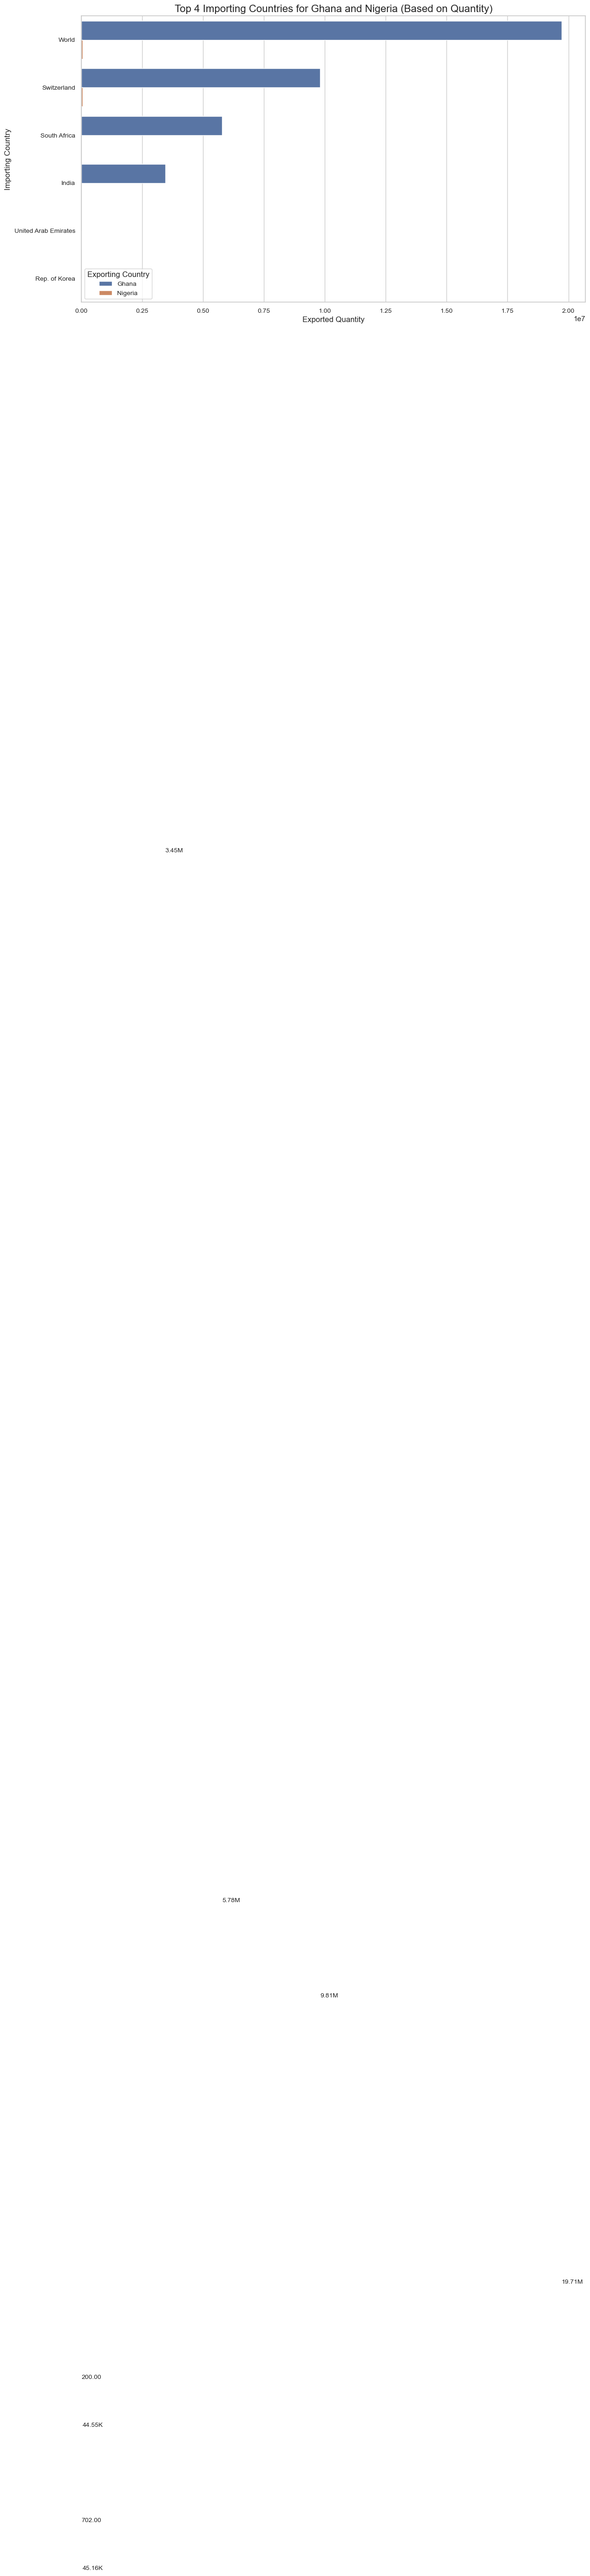

<Figure size 640x480 with 0 Axes>

In [92]:

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_4_exports,
    x='qty',
    y='partnerDesc',
    hue='reporterDesc',
    dodge=True
)

# Annotate the bars with formatted quantities
for index, row in top_4_exports.iterrows():
    plt.text(
        row['qty'],
        index,
        row['formatted_qty'],
        va='center',
        ha='left',
        fontsize=10
    )

# Titles and labels
plt.title('Top 4 Importing Countries for Ghana and Nigeria (Based on Quantity)', fontsize=16)
plt.xlabel('Exported Quantity', fontsize=12)
plt.ylabel('Importing Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Exporting Country', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Optionally save the visualization
plot_path = 'top_5_exports_visualization.png'  # Replace with your desired file path
plt.savefig(plot_path)


/var/folders/6l/_0lkgy4j415437kjczzvtdnh0000gn/T/ipykernel_31277/4241815342.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


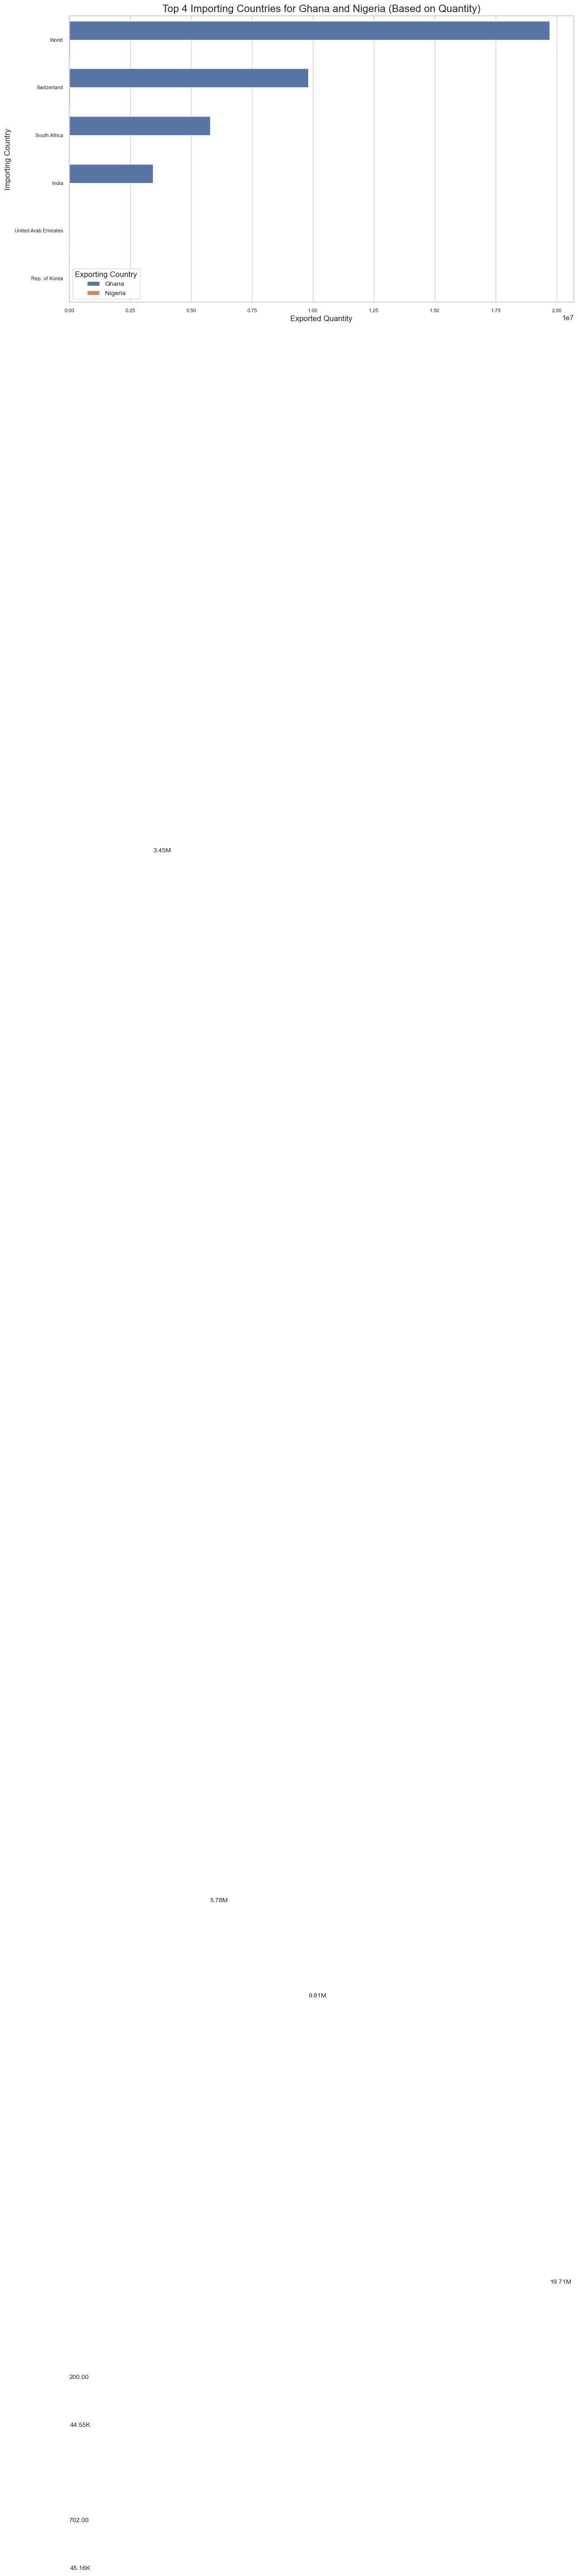

In [96]:
# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_4_exports,
    x='qty',
    y='partnerDesc',
    hue='reporterDesc',
    dodge=True
)

# Annotate the bars with formatted quantities
for index, row in top_4_exports.iterrows():
    plt.text(
        row['qty'],
        index,
        row['formatted_qty'],
        va='center',
        ha='left',
        fontsize=10
    )

# Titles and labels
plt.title('Top 4 Importing Countries for Ghana and Nigeria (Based on Quantity)', fontsize=16)
plt.xlabel('Exported Quantity', fontsize=12)
plt.ylabel('Importing Country', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Exporting Country', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


Top exporting country in 2018: Ghana
Most frequently exported commodity: Gold (including gold plated with platinum) unwrought or in semi-manufactured forms, or in powder form
Country with highest total quantity exported: Ghana
Estimated quantity percentage: 10.36%


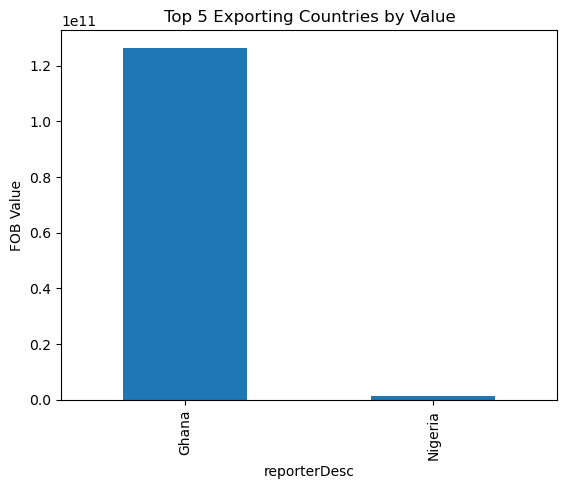

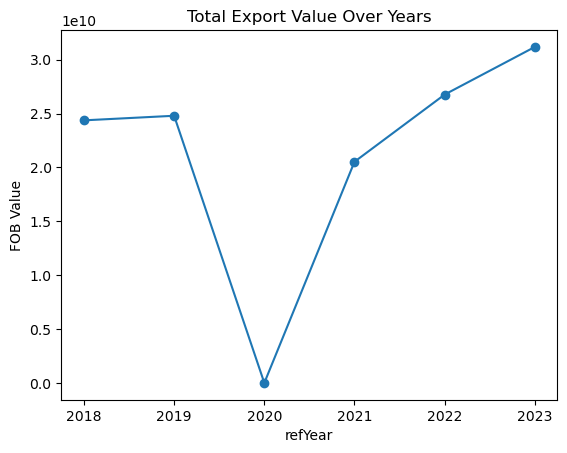

In [26]:
# Load the dataset
file_path = "/Users/chiragprabhakar/Downloads/merged_data (1).xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 1. Country with the highest export value per year
def top_exporting_country(year):
    yearly_data = df[df['refYear'] == year]
    top_country = yearly_data.groupby('reporterDesc')['fobvalue'].sum().idxmax()
    return top_country

# 2. Most frequently exported commodity
most_frequent_commodity = df['cmdDesc'].mode()[0]

# 3. Country with highest total quantity exported
top_quantity_country = df.groupby('reporterDesc')['qty'].sum().idxmax()

# 4. Average FOB value of exports per country
avg_fob_per_country = df.groupby('reporterDesc')['fobvalue'].mean()

# 5. Top 5 exporters by trade value
top_5_exporters = df.groupby('reporterDesc')['fobvalue'].sum().nlargest(5)

def plot_top_5_exporters():
    top_5_exporters.plot(kind='bar', title='Top 5 Exporting Countries by Value', ylabel='FOB Value')
    plt.show()

# 6. Percentage of estimated quantity exports
estimated_qty_percentage = df['isQtyEstimated'].mean() * 100

# 7. Trend of total export value over years
def plot_export_trend():
    trend = df.groupby('refYear')['fobvalue'].sum()
    trend.plot(marker='o', title='Total Export Value Over Years', ylabel='FOB Value')
    plt.show()

# Running the functions
year = 2018  # Example year
print(f"Top exporting country in {year}: {top_exporting_country(year)}")
print(f"Most frequently exported commodity: {most_frequent_commodity}")
print(f"Country with highest total quantity exported: {top_quantity_country}")
print(f"Estimated quantity percentage: {estimated_qty_percentage:.2f}%")

plot_top_5_exporters()
plot_export_trend()

Top exporting country in 2018: Ghana
Most frequently exported commodity: Gold (including gold plated with platinum) unwrought or in semi-manufactured forms, or in powder form
Country with highest total quantity exported: Ghana
Estimated quantity percentage: 10.36%


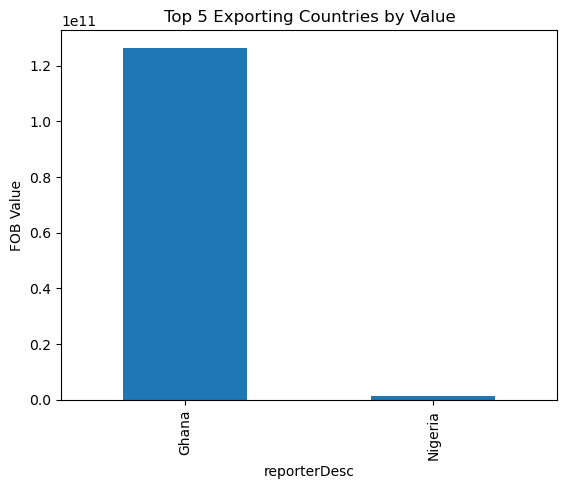

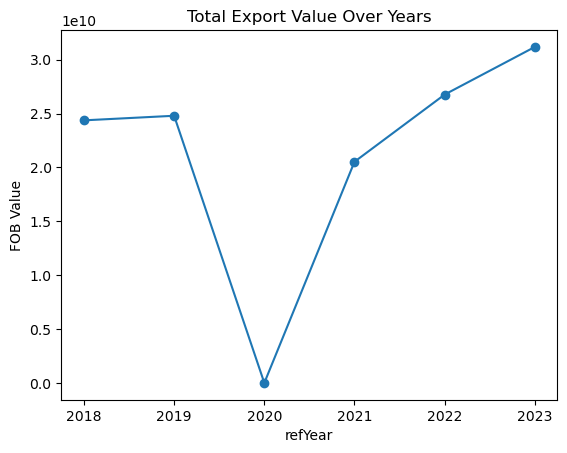

In [28]:


# 1. Country with the highest export value per year
def top_exporting_country(year):
    yearly_data = df[df['refYear'] == year]
    top_country = yearly_data.groupby('reporterDesc')['fobvalue'].sum().idxmax()
    return top_country

# 2. Most frequently exported commodity
most_frequent_commodity = df['cmdDesc'].mode()[0]

# 3. Country with highest total quantity exported
top_quantity_country = df.groupby('reporterDesc')['qty'].sum().idxmax()

# 4. Average FOB value of exports per country
avg_fob_per_country = df.groupby('reporterDesc')['fobvalue'].mean()

# 5. Top 5 exporters by trade value
top_5_exporters = df.groupby('reporterDesc')['fobvalue'].sum().nlargest(5)

def plot_top_5_exporters():
    top_5_exporters.plot(kind='bar', title='Top 5 Exporting Countries by Value', ylabel='FOB Value')
    plt.show()

# 6. Percentage of estimated quantity exports
estimated_qty_percentage = df['isQtyEstimated'].mean() * 100

# 7. Trend of total export value over years
def plot_export_trend():
    trend = df.groupby('refYear')['fobvalue'].sum()
    trend.plot(marker='o', title='Total Export Value Over Years', ylabel='FOB Value')
    plt.show()

# Running the functions
year = 2018  # Example year
print(f"Top exporting country in {year}: {top_exporting_country(year)}")
print(f"Most frequently exported commodity: {most_frequent_commodity}")
print(f"Country with highest total quantity exported: {top_quantity_country}")
print(f"Estimated quantity percentage: {estimated_qty_percentage:.2f}%")

plot_top_5_exporters()
plot_export_trend()